In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pylab
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
from sklearn import neighbors,datasets
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB

import random
import math

import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


K is 1
The prediction is: [1 0 0 1 0 0 1 0 0 1]
The probability of prediction is:
 [[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]
Mean Absolute Average: 0.5 

K is 10
The prediction is: [1 0 1 1 0 0 1 0 0 1]
The probability of prediction is:
 [[0.  1. ]
 [1.  0. ]
 [0.4 0.6]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [0.6 0.4]
 [1.  0. ]
 [0.  1. ]]
Mean Absolute Average: 0.4 



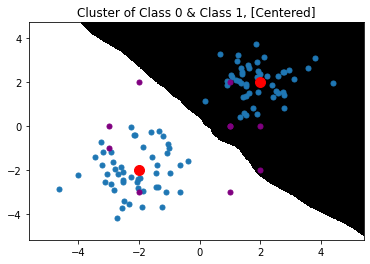

In [ ]:
#Synthetic Data/Scatter plot 
#Question 0
k = [1,10]
array_size = 100
center = [[-2,-2],[2,2]]

X1,y1= make_blobs(n_samples = array_size,
                 centers = center,
                 cluster_std = .9,
                 random_state = 3
                 )
class1 = X1[:, 0]
class2 = X1[:, 1]
y2 = y1[:10]

#KNeighbor with K = 1, 10
#Question 1
container= []
for x, y in zip(class1,class2):
  z = ([x,y])
  container.append(z)
X2 = np.array(container)

for n in k:
  print("K is {}".format(n))
  model=KNeighborsClassifier(n_neighbors = n)
  model.fit(X2,y1)
  np.random.seed(9)
  x2_test = np.random.randint(-3,3, size =([10,2]))
  #print("The Test Sample are:\n {}".format(x2_test,"\n"))
  print("The prediction is: {}".format(model.predict(x2_test)))
  print("The probability of prediction is:\n {}".format(model.predict_proba(x2_test)))
  print("Mean Absolute Average: {}".format(mean_absolute_error(y2,model.predict(x2_test))),"\n")
  

#True Decision Boundary
x_min, x_max = class1.min()-1, class1.max()+1 
y_min, y_max = class2.min()-1, class2.max()+1 
x_p1, y_p1 = np.meshgrid(np.arange(x_min, x_max,.01),
                         np.arange(y_min, y_max, .01))
Z = model.predict(np.c_[x_p1.ravel(), y_p1.ravel()])
Z = Z.reshape(x_p1.shape)
plt.pcolormesh(x_p1, y_p1, Z,cmap = "Greys",alpha = 1)


plt.title("Cluster of Class 0 & Class 1, [Centered]")
plt.scatter(X1[:, 0], X1[:, 1], s = 25)
plt.scatter(2,2, c = 'red', s= 100)
plt.scatter(-2,-2, c = 'red', s= 100)
plt.scatter(x2_test[:, 0], x2_test[:, 1], c = "purple", s =25)





#Average Error 
#Question 2 
#I have some reservations finding the Mean Error. It allows space for misintrepration of the data...
#(Because we both have positive/negative values, it can easily conlude that the Mean Error = 0)
# I will be solving for Mean Absolute Error to circumvent this obstacle. 

**Question 3**
Repeat the process for k = 2, 3, 4, ..., 9

Plot the error versus 1/k, and did you see your result like Figure 2.17 

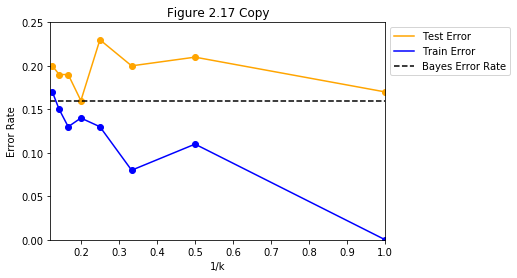

In [ ]:
#Using K = np.arange(1,10,step = 1 ) we can meet the given parameters.
#Although it does not accuractely re-create figure 2.17, it does re-create the
#relationship between Error Rate, and the level of flexibility (1/k) (on the training/test error)

np.random.seed(2)
x2,y2 = make_blobs(n_samples = 200,
                   centers = [[-.5,-.5],[.5,.5]],
                   cluster_std = .7)

#Spliting synthetic data, into 4 sub-classes. 
X_train,X_test,y_train,y_test = train_test_split(x2,y2,random_state=1,test_size = .5)
k = np.arange(1,9,step =1 )

class1 = X_train[:, 0]
class2 = X_train[:, 1]

te_cnt = []
tr_cnt = []

for n in k:
  neigh = KNeighborsClassifier(n_neighbors=n)
  neigh.fit(X_train,y_train)
  
  predict = neigh.predict(X_test)
  predict1 = neigh.predict(X_train)

  #calculating Test/Train error by subtracting "accuracy_score" with 1
  test_error =1-(accuracy_score(y_test,predict))
  te_cnt.append(test_error)
  train_error = 1-(accuracy_score(y_train,predict1)) 
  tr_cnt.append(train_error)
  #print('With K={} accuracy is {:.3f}'.format(n, error))

  
#Plotting outputs. 
axes = plt.gca()
axes.set_ylim([0.0,.25])
axes.set_xlim([.12,1])

plt.hlines(min(te_cnt),.12,1,linestyles = "--", label = "Bayes Error Rate")
plt.plot(1/k,te_cnt,c="orange", label = "Test Error")
plt.plot(1/k,tr_cnt,c="blue", label = "Train Error")
plt.scatter(1/k,te_cnt,c = "orange")
plt.scatter(1/k,tr_cnt,c = "blue")
plt.ylabel("Error Rate")
plt.xlabel("1/k")
plt.title("Figure 2.17 Copy")
plt.legend(bbox_to_anchor = (1,1))
           







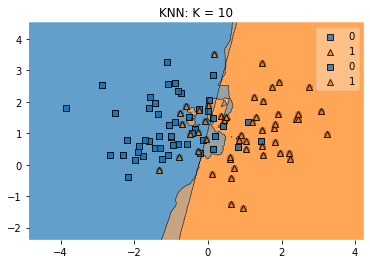

In [ ]:
#I tried. 
center = [[-1,1],[1,1]]

X2, y2= make_blobs(n_samples=100, n_features=2, 
                                centers=center, random_state=5,
                                cluster_std = 1)

plt.scatter(X2[:, 0], X2[:, 1])
fig_model = neighbors.KNeighborsClassifier(n_neighbors=10)
fig_model.fit(X2, y2)

svm = SVC(C=0.5, kernel='linear')
svm.fit(X2, y2)

plot_decision_regions(X2, y2, clf=svm)
plot_decision_regions(X2, y2, clf=fig_model)

plt.title("KNN: K = 10")
plt.show()

